<a href="https://colab.research.google.com/github/divyanamani/Telecom_churn_prediction/blob/master/Telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,

In [ ]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6611 entries, 0 to 6610
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(212), int64(2), object(12)
memory usage: 11.4+ MB


In [ ]:
telecom_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [ ]:
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,6611.0,7.001210e+09,694169.083463,7.000000e+09,7.000612e+09,7.001210e+09,7.001816e+09,7.002411e+09
circle_id,6611.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,6545.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,6545.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,6545.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,6611.0,2.882477e+02,310.574991,-2.041228e+03,9.522550e+01,2.059700e+02,3.800115e+02,4.497680e+03
arpu_7,6611.0,2.800693e+02,314.237437,-2.014045e+03,8.989500e+01,1.955960e+02,3.721205e+02,6.453689e+03
arpu_8,6611.0,2.764258e+02,303.210553,-9.458080e+02,8.137200e+01,1.926630e+02,3.734335e+02,4.269998e+03
arpu_9,6611.0,2.590763e+02,295.848680,-2.672430e+02,6.382000e+01,1.780760e+02,3.553130e+02,5.288685e+03
onnet_mou_6,6373.0,1.346815e+02,303.542495,0.000000e+00,7.990000e+00,3.551000e+01,1.190400e+02,6.459340e+03


In [ ]:
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_6         0.00
last_date_of_month_7         0.79
last_date_of_month_8         1.24
last_date_of_month_9         1.78
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.60
onnet_mou_7                  3.78
onnet_mou_8                  5.35
onnet_mou_9                  7.50
offnet_mou_6                 3.60
offnet_mou_7                 3.78
offnet_mou_8                 5.35
offnet_mou_9                 7.50
roam_ic_mou_6                3.60
roam_ic_mou_7                3.78
roam_ic_mou_8                5.35
roam_ic_mou_9                7.50
roam_og_mou_6                3.60
roam_og_mou_7                3.78
roam_og_mou_8                5.37
roam_og_mou_9                7.52
loc_og_t2t_mou

Note: Missing values will be handled after filtering for high valued customers.

Identifying Categorical,Numerical and Date columns

In [ ]:
#dividing date categorical and numerical cols for treating missing values
telecom_data.dtypes
dateCols = telecom_data.columns[telecom_data.columns.str.contains('date')].values
catCols = telecom_data.columns[(telecom_data.columns.str.contains('night')) | (telecom_data.columns.str.contains('monthly_'))| (telecom_data.columns.str.contains('fb_'))].values
numCols = [col for col in telecom_data.columns if col not in dateCols]
numCols = [col for col in numCols if col not in catCols]
print("Cat Cols length: {}".format(len(catCols)))
print("Num Cols length: {}".format(len(numCols)))
print("date Cols length: {}".format(len(dateCols)))


Cat Cols length: 16
Num Cols length: 198
date Cols length: 12


In [ ]:
#checking skewed variables
skewed_data = telecom_data.skew(axis = 0, skipna = True) 
skewed_vars = skewed_data[skewed_data >100].index

In [ ]:
skewed_vars

Index([], dtype='object')

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0,len(skewed_vars)):
  plt.subplot(3,3,i+1)
  sns.distplot(telecom_data[skewed_vars[i]])
  plt.tight_layout()

<Figure size 864x360 with 0 Axes>

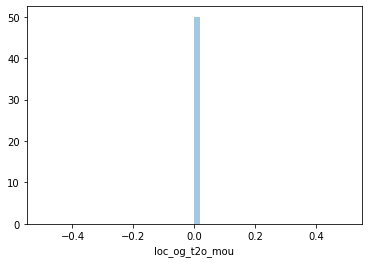

In [ ]:
sns.distplot(telecom_data['loc_og_t2o_mou'])

In [ ]:
telecom_data.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [ ]:
#Filter high value customers
# Formula to use: (Total_calling recharge of month 6 and 7 + Total data recharge of month 6 and 7)/2
month_6 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('6')]]
month_7 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('7')]]

print("Shape before filtering: {}".format(telecom_data.shape))
telecom_data['total_data_6_7'] = telecom_data['total_rech_data_6'] + telecom_data['total_rech_data_7'] ## need to check these values
telecom_data['toal_call_6_7'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']
telecom_data['avg_usage_6_7'] = (telecom_data['toal_call_6_7'])/2
telecom_data = telecom_data[telecom_data['avg_usage_6_7'] > telecom_data['avg_usage_6_7'].quantile(0.70)]
telecom_data.drop(['avg_usage_6_7'],axis=1,inplace=True)
print("Shape After filtering: {}".format(telecom_data.shape))


Shape before filtering: (6611, 226)
Shape After filtering: (1978, 228)


In [ ]:
#Defining Churn - Target Variable
cols_for_churn_det = ['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9'] 

#checking missing values for these cols
telecom_data[cols_for_churn_det].isnull().sum()
## no missing values for these - proceeding wtith determining target variable
telecom_data['total_usage_9'] = telecom_data['total_og_mou_9'] +telecom_data['total_ic_mou_9']+telecom_data['vol_2g_mb_9']+telecom_data['vol_3g_mb_9']
telecom_data['churn'] = telecom_data['total_usage_9'].apply(lambda x: 0 if x>0 else 1)
telecom_data[['total_usage_9','churn']].head()
telecom_data.drop(['total_usage_9'],axis=1,inplace=True)
telecom_data['churn'].value_counts(normalize=True)

0    0.911527
1    0.088473
Name: churn, dtype: float64

- 8% customers have churned

**Imputing Missing values**<br>
    Observations:<br>
            Columns with missing values > 60% are pertaining to Data recharge and usage.Hence,all have been imputed with 0 as 0 implies the service is not used.

In [ ]:
#Dropping cols with missing % >70
col_missing_perc = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)

In [ ]:
#getting cols with more than 70% missing and dropping them
col_missing_perc = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)
col_missing_perc_greater_70 = []
for i in range(0,len(col_missing_perc)):
    if col_missing_perc[i]>50:
        col_missing_perc_greater_70.append(col_missing_perc.index[i])
    
#dropping cols with more than 70% missing - cannot drop blindly need to check indivisually
#telecom_data.drop(col_missing_perc_greater_70, axis = 1,inplace=True)

In [ ]:
#col_missing_perc_greater_70=[col for col in col_missing_perc_greater_70 if col.startswith not in ('date_of_last_rech_data') ]
#col_missing_perc_greater_70

for col in col_missing_perc_greater_70:
  if col not in dateCols:
    telecom_data.loc[pd.isnull(telecom_data[col]),col] =0

In [ ]:
#getting cols with more than 70% missing and dropping them
col_missing_perc = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)
col_missing_perc_greater_70 = []
for i in range(0,len(col_missing_perc)):
    if col_missing_perc[i]>50:
        col_missing_perc_greater_70.append(col_missing_perc.index[i])


In [ ]:
col_missing_perc_greater_70

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [ ]:
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.25
std_og_t2o_mou               0.25
loc_ic_t2o_mou               0.25
last_date_of_month_6         0.00
last_date_of_month_7         0.25
last_date_of_month_8         0.81
last_date_of_month_9         1.31
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.01
onnet_mou_7                  0.86
onnet_mou_8                  3.08
onnet_mou_9                  5.51
offnet_mou_6                 1.01
offnet_mou_7                 0.86
offnet_mou_8                 3.08
offnet_mou_9                 5.51
roam_ic_mou_6                1.01
roam_ic_mou_7                0.86
roam_ic_mou_8                3.08
roam_ic_mou_9                5.51
roam_og_mou_6                1.01
roam_og_mou_7                0.86
roam_og_mou_8                3.08
roam_og_mou_9                5.51
loc_og_t2t_mou

In [ ]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 7 to 6609
Data columns (total 229 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              flo

In [ ]:
dateCols

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype=object)

In [ ]:
# imputing particular day in all the date fields as the month and year are constant
for col in dateCols:
  telecom_data[col]=pd.to_datetime(telecom_data[col],errors='coerce')
  telecom_data[col]=telecom_data[col].dt.day


In [ ]:
for col in col_missing_perc_greater_70:
  if col in dateCols:
    telecom_data.loc[pd.isnull(telecom_data[col]),col] =0

In [ ]:
missing_data=round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)
#print(type(values))
non_zero_missing=missing_data[missing_data!=0]
tel_data_nz_missing=telecom_data[non_zero_missing.index]
tel_data_nz_missing.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
7,0.0,0.0,0.0,31.0,31.0,30.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,27.0,25.0,26.0,30.0
8,0.0,0.0,0.0,31.0,31.0,30.0,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.0,31.0,30.0,30.0
13,0.0,0.0,0.0,31.0,31.0,30.0,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.00,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0.00,7.49,8.51,215.58,26.11,255.26,138.29,115.68,38.29,154.58,62.39,308.13,29.79,317.91,151.51,0.00,0.00,1.91,0.0,0.0,0.0,0.0,0.0,423.81,68.09,474.41,213.91,0.45,0.0,0.0,0.0,245.28,62.11,393.39,259.33,83.48,16.24,21.44,20.31,20.0,22.0,30.0,26.0
16,0.0,0

In [ ]:
#round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)

In [ ]:

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5) ## chose 5 as data is huge and also  5 is an industry standard.
telecom_data_imputed=imputer.fit_transform(telecom_data[non_zero_missing.index])

In [ ]:
telecom_data_imputed.shape

(1978, 126)

In [ ]:
telecom_data.shape

(1978, 229)

In [ ]:
telecom_data_imputed[0]

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 3.10000e+01, 3.10000e+01,
       3.00000e+01, 5.78400e+01, 5.46800e+01, 5.22900e+01, 9.34720e+01,
       4.53430e+02, 5.67160e+02, 3.25910e+02, 3.09672e+02, 1.62300e+01,
       3.34900e+01, 3.16400e+01, 7.46800e+00, 2.37400e+01, 1.25900e+01,
       3.80600e+01, 3.72600e+00, 5.13900e+01, 3.13800e+01, 4.02800e+01,
       8.50220e+01, 3.08630e+02, 4.47380e+02, 1.62280e+02, 2.29738e+02,
       6.21300e+01, 5.51400e+01, 5.32300e+01, 3.20040e+01, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 4.02200e+00, 4.22160e+02, 5.33910e+02,
       2.55790e+02, 3.46776e+02, 4.30000e+00, 2.32900e+01, 1.20100e+01,
       7.32800e+00, 4.98900e+01, 3.17600e+01, 4.91400e+01, 3.83960e+01,
       6.66000e+00, 2.00800e+01, 1.66800e+01, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 6.08600e+01, 7.51400e+01,
       7.78400e+01, 4.57260e+01, 0.00000e+00, 1.80000e-01, 1.00100e+01,
       0.00000e+00, 4.50000e+00, 0.00000e+00, 6.50000e+00, 6.918

In [ ]:
non_zero_missing.index

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object', length=126)

In [ ]:
telecom_data[non_zero_missing.index].iloc[0]

loc_og_t2o_mou            0.00
std_og_t2o_mou            0.00
loc_ic_t2o_mou            0.00
last_date_of_month_7     31.00
last_date_of_month_8     31.00
last_date_of_month_9     30.00
onnet_mou_6              57.84
onnet_mou_7              54.68
onnet_mou_8              52.29
onnet_mou_9                NaN
offnet_mou_6            453.43
offnet_mou_7            567.16
offnet_mou_8            325.91
offnet_mou_9               NaN
roam_ic_mou_6            16.23
roam_ic_mou_7            33.49
roam_ic_mou_8            31.64
roam_ic_mou_9              NaN
roam_og_mou_6            23.74
roam_og_mou_7            12.59
roam_og_mou_8            38.06
roam_og_mou_9              NaN
loc_og_t2t_mou_6         51.39
loc_og_t2t_mou_7         31.38
loc_og_t2t_mou_8         40.28
loc_og_t2t_mou_9           NaN
loc_og_t2m_mou_6        308.63
loc_og_t2m_mou_7        447.38
loc_og_t2m_mou_8        162.28
loc_og_t2m_mou_9           NaN
loc_og_t2f_mou_6         62.13
loc_og_t2f_mou_7         55.14
loc_og_t

In [ ]:
telecom_data[non_zero_missing.index]=telecom_data_imputed


In [ ]:
# missing_data=round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)
# #print(type(values))
# zero_missing=missing_data[missing_data!=0]
# tel_data_nz_missing=telecom_data[zero_missing.index]
# tel_data_nz_missing.head()



In [ ]:
# Dropping cols that belong to churn month 9
month_9_cols = telecom_data.columns[telecom_data.columns.str.endswith('9')]
telecom_data.drop(month_9_cols,axis=1,inplace=True)
telecom_data.drop(['sep_vbc_3g'],axis=1,inplace=True)
telecom_data.shape

(1978, 174)

## Exploratory Data Analysis

### EDA - Categorical **Variables**

In [ ]:
catCols=[col for col in catCols if not col.endswith('9')]
numCols=[col for col in numCols if not col.endswith('9')]
dateCols=[col for col in dateCols if not col.endswith('9')]
print("Cat Cols length: {}".format(len(catCols)))
print("Num Cols length: {}".format(len(numCols)))
print("date Cols length: {}".format(len(dateCols)))

Cat Cols length: 12
Num Cols length: 151
date Cols length: 9


In [ ]:
for i in catCols:
  print(pd.crosstab(telecom_data.churn,telecom_data[i],normalize=True))
  print("***************")

night_pck_user_6       0.0       1.0
churn                               
0                 0.903438  0.008089
1                 0.087462  0.001011
***************
night_pck_user_7       0.0       1.0
churn                               
0                 0.906471  0.005056
1                 0.088473  0.000000
***************
night_pck_user_8       0.0       1.0
churn                               
0                 0.905966  0.005561
1                 0.088473  0.000000
***************
monthly_2g_6       0.0       1.0       2.0       3.0       4.0
churn                                                         
0             0.797270  0.100101  0.013145  0.000506  0.000506
1             0.082406  0.006067  0.000000  0.000000  0.000000
***************
monthly_2g_7       0.0       1.0      2.0       4.0       5.0
churn                                                        
0             0.796259  0.100607  0.01365  0.000506  0.000506
1             0.084429  0.004044  0.00000  0.000000  0

- Inferences:
  - Out of all the customers, customers who do not opt for night pack are highly like to be churned. For the month of June there were 6% customers who did not have night pack and churned.
 
 - Out of all the customers, cutomers who do not opt for monthly 2G/3G plans are highly likely to be churned. For the month of june july and August, ~ 8% of customers are those who do nor have monthly 2G/3G plans and churned.

 - For the month of June and July, ~5% users used Facebook/Social networking sites services and churned.

In [ ]:
#Function to check total counts, skewness and importance of a categorical column based on conversion rate. 
def check_count_conversion_rate(data,X,target):
    #checking counts of col
    col_counts = pd.DataFrame(data[X].value_counts()).reset_index()
    col_counts.columns = [X,'Counts']
    col_counts['Total%'] = col_counts['Counts']/len(data.index)
    #checking conversion rate by col
    groupby_col = pd.DataFrame(data.groupby(X)[target].mean()).reset_index()

    col_counts_percentage = col_counts.merge(groupby_col,how='inner',on=X)
    return col_counts_percentage

In [ ]:
check_count_conversion_rate(telecom_data,'night_pck_user_6','churn')

,night_pck_user_6,Counts,Total%,churn
0,0.0,1960,0.9909,0.088265
1,1.0,18,0.0091,0.111111


In [ ]:
check_count_conversion_rate(telecom_data,'fb_user_6','churn')

,fb_user_6,Counts,Total%,churn
0,0.0,1293,0.653691,0.102862
1,1.0,685,0.346309,0.061314


In [ ]:
check_count_conversion_rate(telecom_data,'monthly_3g_6','churn')

,monthly_3g_6,Counts,Total%,churn
0,0.0,1758,0.888777,0.088737
1,1.0,170,0.085945,0.088235
2,2.0,39,0.019717,0.076923
3,3.0,6,0.003033,0.166667
4,5.0,2,0.001011,0.000000
5,4.0,2,0.001011,0.000000
6,7.0,1,0.000506,0.000000


- 88% customers do not have monthly 3G plan in month 6. Out of those, 8% churned.

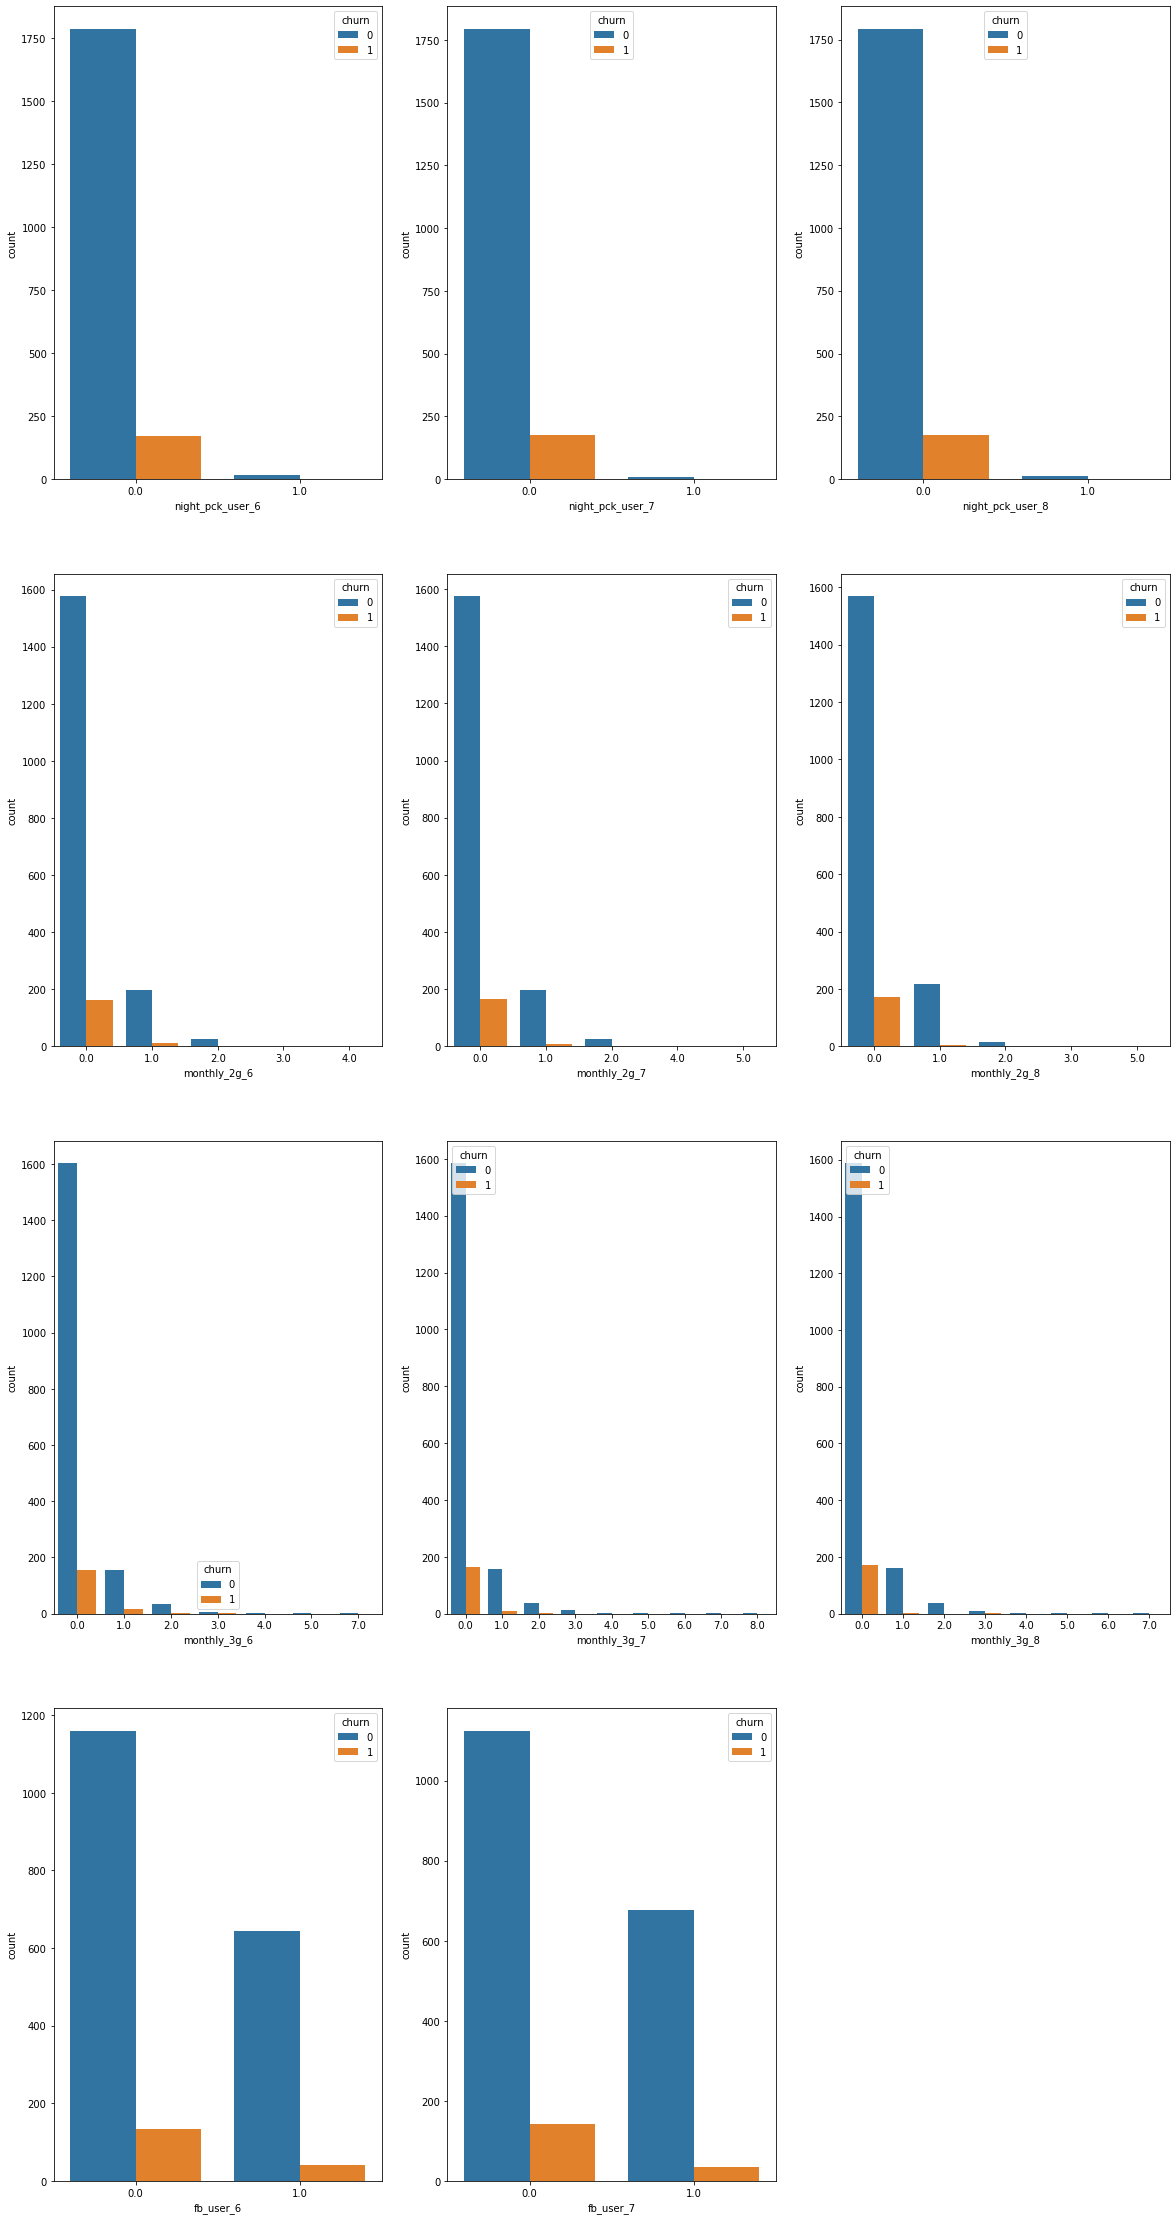

In [ ]:
#EDA for Cat cols
def countplot_catVariables(cols):
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(4,3,i+1)
        sns.countplot(x = cols[i], data = telecom_data,hue= 'churn')
    plt.show()
    
countplot_catVariables(catCols[:-1])

### EDA - Numerical Data

In [ ]:
month6_numCols = [i for i in numCols if i.endswith('_6')]
month6_numCols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'sachet_2g_6',
 'sachet_3g_6']

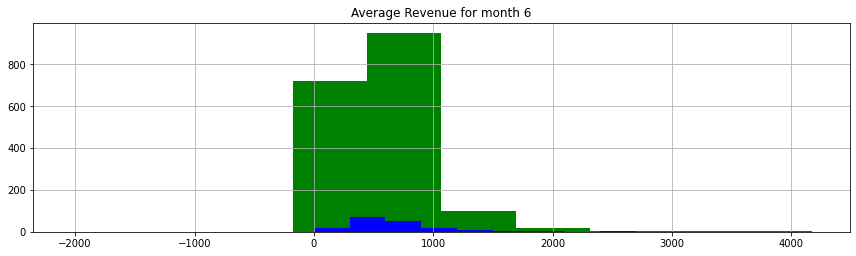

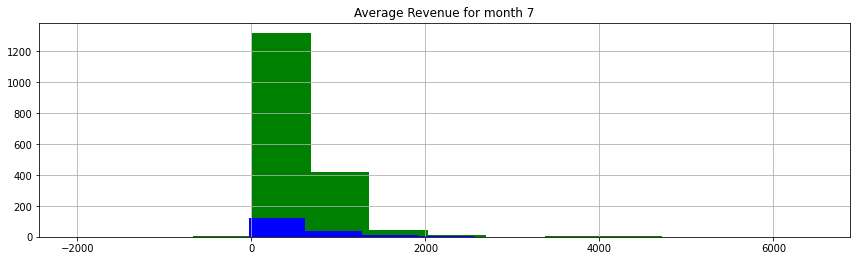

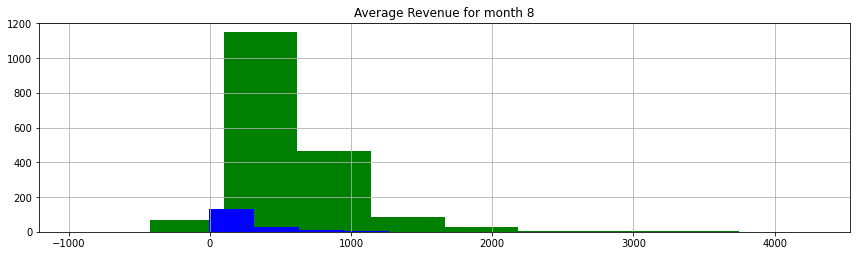

            arpu_6       arpu_7       arpu_8
count   175.000000   175.000000   175.000000
mean    732.973709   564.437829   243.482686
std     486.113654   637.933673   402.213256
min       0.000000   -28.543000    -5.000000
25%     435.894000   250.698500     0.000000
50%     617.107000   427.220000    61.000000
75%     858.358500   683.745000   356.370500
max    2995.480000  6453.689000  3171.480000


In [ ]:
#Checking Average Revenue per user
revenues = ['arpu_6','arpu_7','arpu_8']

for i in range(0,len(revenues)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][revenues[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][revenues[i]].hist(color='blue')
  plt.title('Average Revenue for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[telecom_data.churn==1][revenues].describe())

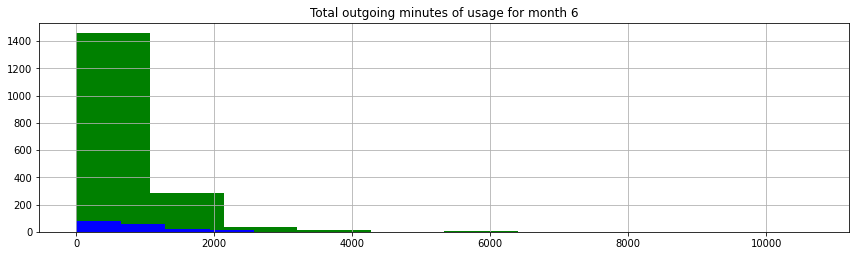

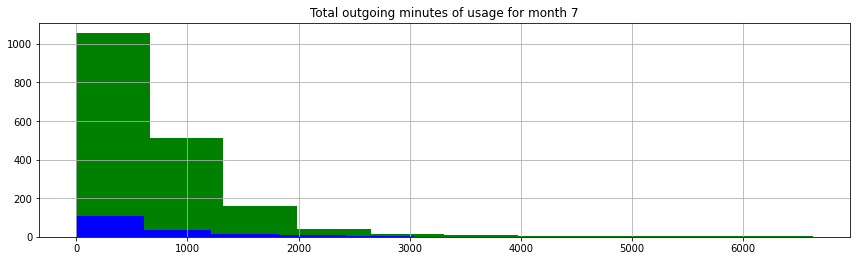

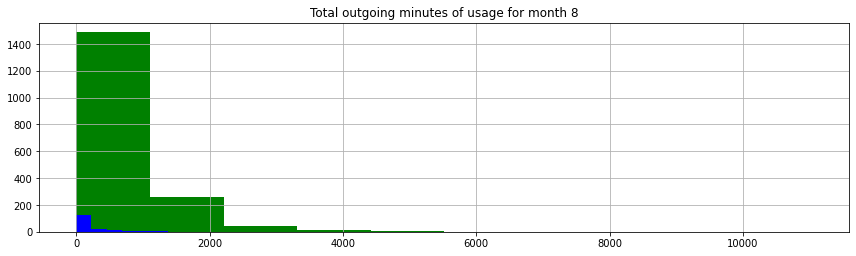

       total_og_mou_6  total_og_mou_7  total_og_mou_8
count      175.000000      175.000000      175.000000
mean       862.045600      641.435543      184.224114
std        851.453947      796.256555      366.216895
min          0.000000        0.000000        0.000000
25%        268.420000       65.720000        0.000000
50%        711.330000      409.990000        0.000000
75%       1153.585000      886.410000      251.500000
max       6453.040000     6074.430000     2282.430000


In [ ]:
#Checking total outgoing minutes of usage for user
outgoing = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']

for i in range(0,len(outgoing)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][outgoing[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][outgoing[i]].hist(color='blue')
  plt.title('Total outgoing minutes of usage for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[telecom_data.churn==1][outgoing].describe())

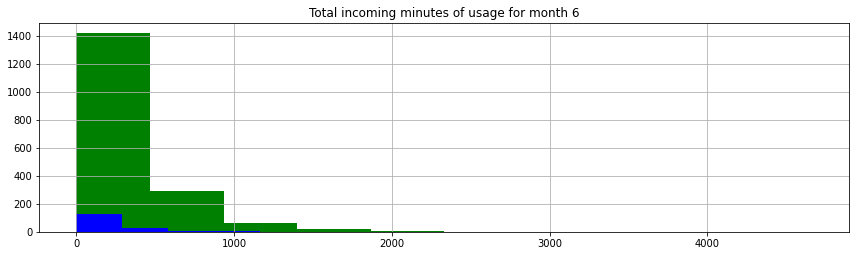

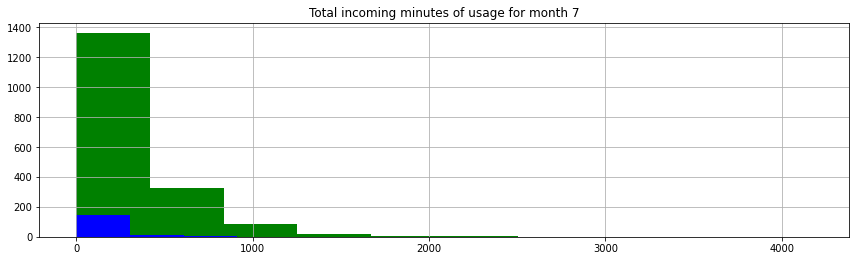

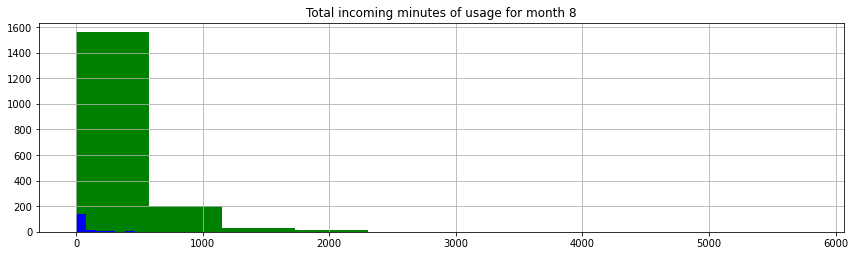

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count      175.000000      175.000000      175.000000
mean       269.732457      216.498914       66.473314
std        421.029104      423.372062      141.966608
min          0.000000        0.000000        0.000000
25%         47.035000       14.610000        0.000000
50%        154.510000       90.810000        0.000000
75%        306.320000      217.455000       61.385000
max       2905.780000     3044.280000      771.130000


In [ ]:
#Checking total outgoing minutes of usage for user
incoming = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

for i in range(0,len(incoming)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][incoming[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][incoming[i]].hist(color='blue')
  plt.title('Total incoming minutes of usage for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[telecom_data.churn==1][incoming].describe())

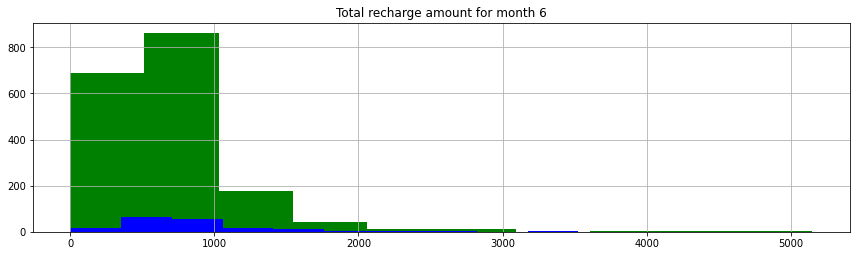

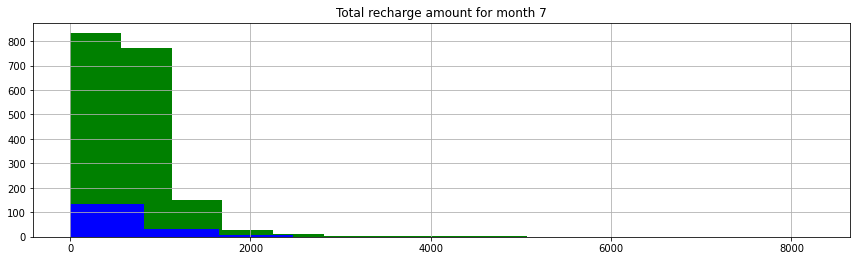

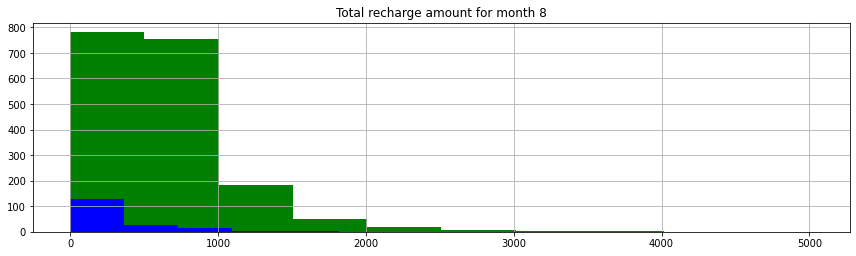

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count       1978.000000       1978.000000       1978.000000
mean         708.188069        693.062690        611.018200
std          466.328059        493.957583        478.730199
min            0.000000          0.000000          0.000000
25%          440.000000        432.250000        321.250000
50%          600.000000        586.000000        525.500000
75%          852.000000        825.500000        794.000000
max         5150.000000       8234.000000       5021.000000


In [ ]:
#Checking total recharge amount for user
recharge = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']

for i in range(0,len(recharge)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][recharge[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][recharge[i]].hist(color='blue')
  plt.title('Total recharge amount for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[recharge].describe())

- Inferences:
  - On an average the revenue, minutes of usage and recharges are less for the customers who finally churned.
  - In the action phase, that is the month August, we notice that the revenue is decreased for all those customers who churned.
  - Similarly for the month of August, the total outgoing amd incoming minutes have been reduced.
  - Customers who did not churn follow the same pattern of usage for all the three months.


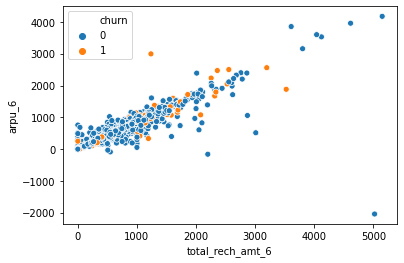

In [ ]:
#scatter plot
sns.scatterplot(x="total_rech_amt_6", y="arpu_6",
              hue="churn",
              data=telecom_data);


## Creating Derived Variables

In [ ]:
# telecom_data['loc_og_perc_6']=round(100*telecom_data['loc_og_mou_6']/telecom_data['total_og_mou_6'],2)
# telecom_data['loc_og_perc_7']=round(100*telecom_data['loc_og_mou_7']/telecom_data['total_og_mou_7'],2)
# telecom_data['std_og_perc_6']=round(100*telecom_data['std_og_mou_6']/telecom_data['total_og_mou_6'],2)
# telecom_data['std_og_perc_7']=round(100*telecom_data['std_og_mou_7']/telecom_data['total_og_mou_7'],2)
# telecom_data['isd_og_perc_6']=round(100*telecom_data['isd_og_mou_6']/telecom_data['total_og_mou_6'],2)
# telecom_data['isd_og_perc_7']=round(100*telecom_data['isd_og_mou_7']/telecom_data['total_og_mou_7'],2)
# telecom_data['og_others_perc_6']=round(100*telecom_data['og_others_6']/telecom_data['total_og_mou_6'],2)
# telecom_data['og_others_perc_7']=round(100*telecom_data['og_others_7']/telecom_data['total_og_mou_7'],2)
# telecom_data['roam_og_perc_6']=round(100*telecom_data['roam_og_mou_6']/telecom_data['total_og_mou_6'],2)
# telecom_data['roam_og_perc_7']=round(100*telecom_data['roam_og_mou_7']/telecom_data['total_og_mou_7'],2)
# telecom_data['onnet_perc_6']=round(100*telecom_data['onnet_mou_6']/(telecom_data['onnet_mou_6']+telecom_data['offnet_mou_6']),2)
# telecom_data['onnet_perc_7']=round(100*telecom_data['onnet_mou_7']/(telecom_data['onnet_mou_7']+telecom_data['offnet_mou_7']),2)

# percentages might not help as per feedback in clustering asignment
# consider age on network 
# consider difference in revenue (arpu) from month 8 (action) and avg of month6 + month7 (good phase)


### Handling date columns

In [ ]:
# Extracting day from the date columns as month and year is not required

dayDateCols = []
for i in dateCols:
  colName = i+"_day"
  dayDateCols.append(colName)
  print("col = {}".format(colName))
  telecom_data[colName] = pd.to_datetime(telecom_data[i])
  telecom_data[colName] = telecom_data[colName].dt.day  

#filling missing value with mode
for column in dayDateCols:
    telecom_data[column].fillna(telecom_data[column].mode()[0], inplace=True)
telecom_data[dayDateCols] = telecom_data[dayDateCols].astype(int)
telecom_data.drop(dateCols,axis=1,inplace=True)

col = last_date_of_month_6_day
col = last_date_of_month_7_day
col = last_date_of_month_8_day
col = date_of_last_rech_6_day
col = date_of_last_rech_7_day
col = date_of_last_rech_8_day
col = date_of_last_rech_data_6_day
col = date_of_last_rech_data_7_day
col = date_of_last_rech_data_8_day


In [ ]:
telecom_data[dayDateCols].isnull().sum()

last_date_of_month_6_day        0
last_date_of_month_7_day        0
last_date_of_month_8_day        0
date_of_last_rech_6_day         0
date_of_last_rech_7_day         0
date_of_last_rech_8_day         0
date_of_last_rech_data_6_day    0
date_of_last_rech_data_7_day    0
date_of_last_rech_data_8_day    0
dtype: int64

In [ ]:
## Outlier Analysis

telecom_data.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])                  

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_6_7,toal_call_6_7,churn,last_date_of_month_6_day,last_date_of_month_7_day,last_date_of_month_8_day,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_data_6_day,date_of_last_rech_data_7_day,date_of_last_rech_data_8_day
count,1.978000e+03,1978.0,1978.0,1978.0,1978.0,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.0,1978.0,1978.0,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.0,1978.0,1978.0,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.00000

In [ ]:
## Correlation 
num_cols=list(telecom_data.select_dtypes(include=['int64','float64']).columns.values)
num_cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6

In [ ]:
##This can be replotted after removing binary variables and other clean up above
plt.figure(figsize=(20,20))
#sns.heatmap(telecom_data[num_cols].corr())

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_6_7,toal_call_6_7,churn,last_date_of_month_6_day,last_date_of_month_7_day,last_date_of_month_8_day,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_data_6_day,date_of_last_rech_data_7_day,date_of_last_rech_data_8_day
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,2370.0,1,1,1,1,1,1,1,1,1,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.

## Data Preparation

In [ ]:
telecom_data.drop(['mobile_number','circle_id'],axis=1,inplace=True)

In [ ]:
#median and mode missing values treatment for now
# for column in catCols:
#   telecom_data[column].fillna(telecom_data[column].mode()[0], inplace=True)

# for column in numCols:
#   telecom_data[column].fillna(telecom_data[column].median(), inplace=True)

In [ ]:
telecom_data.isnull().sum()

loc_og_t2o_mou                  0
std_og_t2o_mou                  0
loc_ic_t2o_mou                  0
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                     0
onnet_mou_7                     0
onnet_mou_8                     0
offnet_mou_6                    0
offnet_mou_7                    0
offnet_mou_8                    0
roam_ic_mou_6                   0
roam_ic_mou_7                   0
roam_ic_mou_8                   0
roam_og_mou_6                   0
roam_og_mou_7                   0
roam_og_mou_8                   0
loc_og_t2t_mou_6                0
loc_og_t2t_mou_7                0
loc_og_t2t_mou_8                0
loc_og_t2m_mou_6                0
loc_og_t2m_mou_7                0
loc_og_t2m_mou_8                0
loc_og_t2f_mou_6                0
loc_og_t2f_mou_7                0
loc_og_t2f_mou_8                0
loc_og_t2c_mou_6                0
loc_og_t2c_mou_7                0
loc_og_t2c_mou

### Creating Dummy Variables

In [ ]:
for col in catCols:
  dummies=pd.get_dummies(telecom_data[col],prefix=col,drop_first=True)
  telecom_data=pd.concat([telecom_data,dummies],axis=1)
telecom_data.drop(catCols,axis=1,inplace=True)

In [ ]:
!pip install imbalanced-learn

In [ ]:
# check version number
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
print(imblearn.__version__)

0.4.3


### Splitting and Scaling Data

**Train Test split**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = telecom_data.drop(['churn'],axis=1)
y = telecom_data.churn
telecom_columns = X.columns

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y)

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(2524, 198)
(1082, 198)


In [ ]:
dsafasd

NameError: ignored

## Dimensionality reduction using PCA


In [ ]:
from sklearn.decomposition import PCA,IncrementalPCA

In [ ]:
pca_inst=PCA(random_state=100)
pca_inst.fit(X_train)

In [ ]:
pca_inst.components_

In [ ]:
pca_inst.explained_variance_ratio_

In [ ]:
cum_variance=np.cumsum(pca_inst.explained_variance_ratio_)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=100, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(cum_variance)
plt.ylabel("Cumulative variance explained")
plt.show()

PCA with 100 components(90% variance)

In [ ]:
PCA_final=IncrementalPCA(n_components=100)

In [ ]:
df_train_PCA=PCA_final.fit_transform(X_train)

In [ ]:
df_train_PCA.shape

In [ ]:
df_test_PCA=PCA_final.transform(X_test)

## Model Building - With PCA


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
logreg_pca_m1=LogisticRegression()
logreg_pca_m1_fit=logreg_pca_m1.fit(df_train_PCA,y_train)

In [ ]:
pred_logreg_pca_test=logreg_pca_m1_fit.predict(df_test_PCA)

In [ ]:
"{:2.2}".format(roc_auc_score(y_test,pred_logreg_pca_test))

### SVM

#### Linear Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(df_train_PCA, y_train)

# predict
y_train_pred = model_linear.predict(df_train_PCA)
y_test_pred = model_linear.predict(df_test_PCA)

In [ ]:

train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))

print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

#### Non Linear Poly kernel

In [ ]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')
non_linear_model_poly.fit(df_train_PCA, y_train)

# predict
y_train_pred = non_linear_model_poly.predict(df_train_PCA)
y_test_pred = non_linear_model_poly.predict(df_test_PCA)

In [ ]:
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))
print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

#### rbf kernel

In [ ]:

# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='rbf')
non_linear_model_poly.fit(df_train_PCA, y_train)

# predict
y_train_pred = non_linear_model_poly.predict(df_train_PCA)
y_test_pred = non_linear_model_poly.predict(df_test_PCA)

In [ ]:
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))
print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

- out of linear, poly, rbf rbg gave the best result. Lets proceed with hyper parameter tuning of rbf kernel



```
# This is formatted as code
```

#### Hyperparameter tuning of SVM

In [ ]:

pipe_steps = [('scaler',StandardScaler()),('pca',PCA()),('SVM',SVC(kernel='rbf'))]
check_params = {
    'pca__n_components' : [90,100],
    'SVM__C':[1,10],
    'SVM__gamma':[0.01,0.001]
}

pipeline = Pipeline(pipe_steps)

folds = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)


#setting up GridSearchCV()
model_cv = GridSearchCV(estimator = pipeline,
                       param_grid = check_params,
                       scoring = 'roc_auc',
                       cv = folds,
                       verbose = 3,
                       return_train_score=True,
                       n_jobs=2)

#fit the model
model_cv.fit(X_smote,y_smote) # Considering our initial data as scaling will be handled by the pipeline.
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:

# converting C to numeric type for plotting on x-axis
cv_results['param_SVM__C'] = cv_results['param_SVM__C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(121)
gamma_01 = cv_results[(cv_results['param_SVM__gamma']==0.01) & (cv_results['param_pca__n_components'] == 100)]

plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')


# subplot 2/3
plt.subplot(122)
gamma_001 = cv_results[(cv_results['param_SVM__gamma']==0.001) & (cv_results['param_pca__n_components'] == 100)]

plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

Final SVM model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(df_train_PCA,y_train)

y_pred = rf_model.predict(df_test_PCA)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_pred)))

In [ ]:
#hyper parameter tuning
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=3, random_state=2)
param_grid = {
    'max_depth': [4,5,10],
    'min_samples_leaf': [5, 6,7],
    'min_samples_split': [5, 10, 16],
    'n_estimators': [100,500,700], 
    'max_features': [5,10,15]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv, n_jobs = -1,verbose = 1)
grid_search.fit(df_train_PCA, y_train)

In [ ]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

## Model Building - feature importance

RFE for logistic regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg_rfe= LogisticRegression(max_iter=200)
rfe=RFE(logreg_rfe,20) 
## As Ujjaini mentioned that we cannot make business decisions with many variables and business always try to derive actionable
## items based on top few variables ,limiting the selection to 20

In [ ]:
X_train.shape

(2524, 198)

In [ ]:
y_train.shape

(2524,)

In [ ]:
telecom_data.shape

In [ ]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=200,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [ ]:
telecom_data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_8_1.0', 'monthly_3g_8_2.0', 'monthly_3g_8_3.0',
       'monthly_3g_8_4.0', 'monthly_3g_8_5.0', 'monthly_3g_8_6.0',
       'monthly_3g_8_7.0', 'fb_user_6_1.0', 'fb_user_7_1.0', 'fb_user_8_1.0'],
      dtype='object', length=199)

In [ ]:
columns_train=list(telecom_data.columns)
columns_train=columns_train.remove('churn')
X_train=pd.DataFrame(X_train,index=[i for i in range(0,len(X_train))],columns=columns_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197
0,0.0,0.0,0.0,0.430173,-1.040505,-0.958785,-0.694092,-0.677523,-0.572211,2.124102,-0.541083,-0.770415,-0.245474,-0.189574,-0.284298,-0.252916,-0.179822,-0.346969,-0.278377,-0.330512,-0.359647,-0.318707,-0.599176,-0.555624,-0.273432,-0.307239,-0.311266,-0.298255,-0.215850,-0.205946,-0.398586,-0.612568,-0.600975,-0.576673,-0.537039,-0.415441,2.675805,-0.249674,-0.464148,-0.148253,-0.176621,-0.200493,0.0,0.0,0.0,1.510218,-0.525750,-0.581246,-0.151811,-0.127239,-0.148547,-0.426503,-0.447981,-0.392073,-0.418619,-0.034359,-0.025174,1.191498,-0.758899,-0.720604,-0.187484,-0.358854,-0.364836,-0.025024,-0.574233,-0.519278,0.007510,-0.270849,-0.318631,-0.091527,-0.642638,-0.591652,-0.171460,-0.176530,-0.238878,-0.198292,-0.326752,-0.336288,-0.195832,-0.210314,-0.167072,0.0,0.0,0.0,-0.248104,-0.341320,-0.382428,-0.206068,-0.716952,-0.606339,-0.481480,-0.191782,-0.235094,-0.246224,-0.234045,-0.201588,-0.194939,-0.207674,-0.163376,0.178516,-0.515610,-0.826024,0.671082,-1.186810,-0.940592,-0.104370,-0.838604,-0.769172,0.235923,-0.654131,-0.491277,0.100603,0.046726,-0.413331,1.096797,-0.220215,-0.428723,0.302281,0.215248,-0.359779,-0.313948,-0.287491,-0.268313,0.555508,-0.283566,-0.368492,0.565631,-0.156022,-0.204588,-0.320975,-0.24527,-0.225730,-0.343050,-0.259153,-0.248472,-0.331448,-0.234582,-0.236613,-0.295771,0.284506,-0.308835,-0.184402,-0.184613,-0.163875,-0.673768,-0.301402,-0.281127,-0.325003,0.164002,-0.379820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.094735,-0.048814,-0.048814,3.295986,-0.091597,0.0,-0.019909,-0.307303,-0.091597,-0.019909,-0.019909,-0.284774,-0.059821,-0.019909,-0.019909,-0.312694,-0.139577,-0.071572,-0.028161,-0.019909,0.0,-0.276001,-0.146123,-0.044552,-0.028161,-0.034496,-0.019909,-0.019909,0.0,-0.238389,-0.103985,-0.065854,-0.034496,-0.019909,-0.019909,0.0,1.500624,1.564241,-0.566389
1,0.0,0.0,0.0,0.320444,-0.178902,-0.868981,0.293971,0.174259,0.295285,0.138857,-0.099490,-0.293403,0.386126,-0.213624,-0.249240,0.972404,-0.272012,-0.230690,-0.212645,-0.251576,-0.306346,-0.534939,-0.467692,-0.388460,-0.321830,-0.307239,-0.296844,-0.302937,-0.215850,0.300898,-0.506045,-0.477585,-0.454598,0.224506,0.368066,0.514974,0.199816,0.209163,-0.008361,-0.148253,-0.176621,-0.200493,0.0,0.0,0.0,0.283973,0.384334,0.367441,-0.151811,-0.121400,-0.148547,-0.153686,0.114783,0.108241,0.784329,-0.034359,-0.025174,0.022157,0.130692,-0.666237,-0.248556,-0.323246,-0.271040,-0.370323,-0.415500,-0.335545,-0.362112,-0.300702,-0.302070,-0.429303,-0.508514,-0.408883,-0.142353,-0.029696,0.241354,-0.128428,-0.043690,-0.138427,-0.195832,-0.210314,-0.167072,0.0,0.0,0.0,-0.188351,-0.060298,0.013581,-0.485447,-0.475724,-0.588425,-0.005133,-0.191782,-0.235094,-0.246224,-0.234045,-0.201588,-0.009523,-0.207674,-0.163376,1.150171,1.024617,-0.707429,0.141626,-0.190507,-0.832114,-0.544865,-0.575500,-0.553868,-0.585130,-0.460463,-0.450075,-0.294067,0.104304,-0.079910,-0.407288,-0.331991,-0.303336,-0.360257,0.116012,-0.161182,0.007195,0.016706,0.133513,-0.427045,-0.182897,-0.260209,-0.108671,-0.078928,-0.180387,-0.320975,-0.24527,-0.225730,-0.263498,-0.259153,-0.177932,-0.271523,-0.278532,-0.160622,-0.295771,0.183217,-0.103461,0.191605,0.203480,0.348591,-0.857144,-0.301402,-0.281127,-0.325003,-0.006739,-0.041805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.094735,-0.048814,-0.048814,-0.315725,-

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
cols=X_train.columns[rfe.support_]
cols